# Homework 3 (100 points)

The goal of this homework is to practice techniques relating to SVD.

## Exercise 1 (65 points)

a) Fetch the "mnist_784" data and store is as a `.csv` (that way you don't have to fetch it every time - which takes about 30s). (4 points)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

# your code here
mnist_784_X = pd.DataFrame(X)
# mnist_784_X.to_csv('mnist_784_X.csv')
# mnist_784_y = pd.DataFrame(y)
# mnist_784_y.to_csv('mnist_784_y.csv')

In [5]:
mnist_784_X = pd.DataFrame(X)

b) Plot the singular value plot for a single example of the 0 digit (5 points)

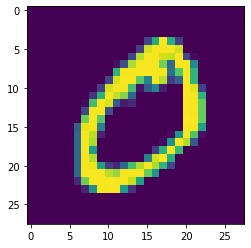

(28, 28) (28,) (28, 28)
[1.82604972e+03 1.16318606e+03 9.03110174e+02 7.86608773e+02
 4.67954497e+02 4.29304155e+02 3.55810467e+02 1.97763283e+02
 1.51076021e+02 1.30820809e+02 8.48944705e+01 6.66724670e+01
 5.66659499e+01 4.68463941e+01 3.80078218e+01 2.56359511e+01
 2.06788193e+01 1.13785694e-13 1.10110988e-13 1.10110988e-13
 1.10110988e-13 1.10110988e-13 1.10110988e-13 1.10110988e-13
 1.10110988e-13 1.10110988e-13 1.10110988e-13 4.64368377e-14]


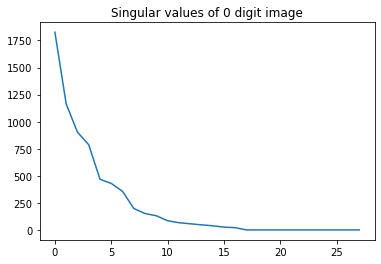

In [24]:
import numpy as np
from numpy.linalg import svd
from matplotlib.pyplot import imshow

# mnist_784 = pd.concat([mnist_784_X, mnist_784_y], axis=1,ignore_index=True)
im = np.array(X[1])
im = im.reshape(28, 28)
plt.imshow(im)
plt.show()
U1, s, VT1 = svd(im)
print(U1.shape,s.shape,VT1.shape)
# print(U)
print(s)
# print(VT)

_ = plt.plot(s)
plt.title('Singular values of 0 digit image')
plt.show()

c) By setting some singular values to 0, plot the approximation of the 0 digit next to the original digit. (5 points)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.48944705e+01 6.66724670e+01
 5.66659499e+01 4.68463941e+01 3.80078218e+01 2.56359511e+01
 2.06788193e+01 1.13785694e-13 1.10110988e-13 1.10110988e-13
 1.10110988e-13 1.10110988e-13 1.10110988e-13 1.10110988e-13
 1.10110988e-13 1.10110988e-13 1.10110988e-13 4.64368377e-14]


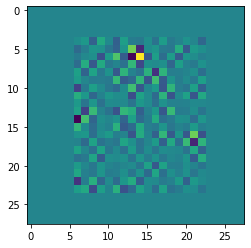

In [25]:
scopy = s.copy()
scopy[0:10] = 0
print(scopy)
reducedX = U1 @ np.diag(scopy) @ VT1
app = reducedX - im
plt.imshow(reducedX)
plt.show()
# _ = plt.plot(app)
# plt.title('approximation of the 0 digit next to the original digit')
# plt.show()

d) Consider the entire dataset as a matrix. Perform SVD and store the dataset approximation in a new `.csv` file. Explain why / how you chose a particular rank. (10 points)

Text(0, 0.5, 'cumulative explained variance')

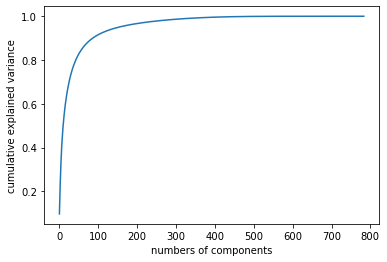

In [26]:
values = mnist_784_X.values
pca = PCA()
pca.fit(values)
cumsum = np.cumsum(pca.explained_variance_ratio_)

Rank = np.argmax(cumsum>=0.95)+1
plt.plot(cumsum)
plt.xlabel('numbers of components')
plt.ylabel('cumulative explained variance')

In [27]:
# im_entire = np.array(X)
# im_entire = im_entire.reshape(70000,28, 28)
values = mnist_784_X.values
U, s_en, VT = svd(values, full_matrices=False)
s_en[Rank:] = 0
appro = U.dot(np.diag(s_en).dot(VT))
    
# x = X - reducedX
# appro = norm(x)

appro = pd.DataFrame(appro)
#appro.to_csv('appro.csv')

Using the RANK I choose can have a better appro results.

e) As in homework 2, using Kmeans on this new dataset, cluster the images from d) using 10 clusters and plot the centroid of each cluster. (10 points)

10


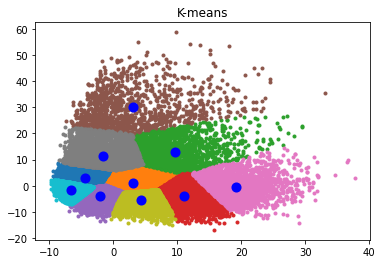

In [28]:
appro1 = appro.values

print(len(np.unique(y)))
# your code here
data = scale(appro1) # scale the data
n_digits = len(np.unique(y))
re_dimens = PCA(n_components=2).fit_transform(data) # reduce the dimentions of MNIST to plot picture

kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(re_dimens)
label_pred = kmeans.labels_

centroids = kmeans.cluster_centers_ # get centroids
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=50, linewidths=3,
            color='b', zorder=10)

for i in range(n_digits):
    x = re_dimens[label_pred == i]
    plt.scatter(x[:, 0], x[:, 1], marker='.', label='label%s'%i)
plt.title('K-means')
plt.show()

f) Repeat e) on the original dataset. Comment on any differences (or lack thereof) you observe. (8 points)

10


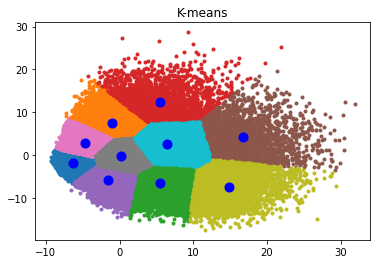

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



print(len(np.unique(y)))
# your code here
data = scale(X) # scale the data
n_digits = len(np.unique(y))
re_dimens = PCA(n_components=2).fit_transform(data) # reduce the dimentions of MNIST to plot picture

kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(re_dimens)
label_pred = kmeans.labels_

centroids = kmeans.cluster_centers_ # get centroids
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=50, linewidths=3,
            color='b', zorder=10)

for i in range(n_digits):
    x = re_dimens[label_pred == i]
    plt.scatter(x[:, 0], x[:, 1], marker='.', label='label%s'%i)
plt.title('K-means')
plt.show()

This figure is a little different from e). The data from e) is from SVD appro matrix.

g) Compare the disagreement distance of the clustering obtained in e) to the true labels, to the disagreement distance of the clustering obtained in f) to the true labels. Comment briefly. (8 points)

In [48]:
disa_distance = 0
def disagreement_dist(P_labels, C_labels):
    global disa_distance
    c = C_labels
    label_pred = P_labels
    for i in range(data.shape[0]):
        for j in range(i + 1, data.shape[0]):
            if (c[i] == c[j] and label_pred[i] != label_pred[j]) or (c[i] != c[j] and label_pred[i] == label_pred[j]):
                disa_distance += 1
            else:
                continue
    return disa_distance

In [11]:
a = disagreement_dist(label_pred, y)
print(a)

KeyboardInterrupt: 

I'm so sorry that I can not write a quick method for this question. I'm quite sure my answer is true. If you have any questions, please contact me at buzjhcs@bu.edu

h) Create a matrix that is the difference between the original dataset and the rank-10 approximation of the dataset. (10 points)

In [12]:
values = mnist_784_X.values
s_en[10:] = 0
appro = U.dot(np.diag(s_en).dot(VT))
print(values.shape)
print('*********************')
print(appro.shape)
# temp = np.power((values - appro),2)

distance_matrix = values - appro
print(distance_matrix.shape)

(70000, 784)
*********************
(70000, 784)
(70000, 784)


i) The largest (using euclidean distance from the origin) rows of the matrix could be considered anomalous data points. Briefly explain why. Plot the 10 images responsible for the 10 largest rows. (5 points)

In [13]:
#distance_matrix.max(0)
distance_row = []
for i in range(distance_matrix.shape[0]):
    distance = np.linalg.norm(distance_matrix[i,:])
    distance_row.append(distance)

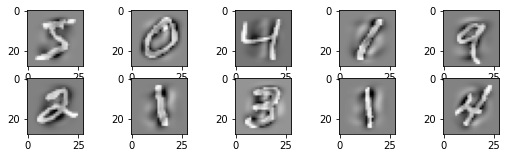

In [14]:
import matplotlib.cm as cm
max_value = max(distance_row)
max_index = distance_row.index(max_value)
top_10 = np.argsort(distance_row)[-10:0]
plt.figure(figsize=(9,6))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(distance_matrix[i,:].reshape(28,28),cmap = cm.Greys_r)
    
plt.show()

## Exercise 2 (35 points)

a) Modify the code below to pick 4 categories of news articles that you think are minimally related (for example `sci.space` and `rec.sport.baseball`). (3 points)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']# your categories here
news_data = fetch_20newsgroups(subset='train', categories=categories)

b) Using the `SnowballStemmer`, stem the words in every article (10 points)

In [42]:
import nltk
from nltk.stem.snowball import SnowballStemmer

nltk.download('punkt')
text = news_data.data
stem_list = []
for doc in text:
    tokens = [word for sent in nltk.sent_tokenize(doc) for word in nltk.sent_tokenize(sent)]
    fh_tokensize = lambda doc:[word for sent in nltk.sent_tokenize(doc) for word in nltk.sent_tokenize(sent)]
    snow_stemmer = SnowballStemmer(language='english')
    stems = [snow_stemmer.stem(t) for t in tokens]
    stem_list.append(stems)

print(stem_list)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JiahuiZhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['from: sd345@city.ac.uk (michael collier)\nsubject: converting images to hp laserjet iii?', 'nntp-posting-host: hampton\norganization: the city university\nlines: 14\n\ndoes anyone know of a good way (standard pc application/pd utility) to\nconvert tif/img/tga files into laserjet iii format.', 'we would also like to\ndo the same, converting to hpgl (hp plotter) files.', 'please email any response.', 'is this the correct group?', 'thanks in advance.', 'michael.', '-- \nmichael collier (programmer)                 the computer unit,\nemail: m.p.collier@uk.ac.city                the city university,\ntel: 071 477-8000 x3769                      london,\nfax: 071 477-8565                            ec1v 0hb.'], ['from: ani@ms.uky.edu (aniruddha b. deglurkar)\nsubject: help: splitting a trimming region along a mesh \norganization: university of kentucky, dept.', "of math sciences\nlines: 28\n\n\n\n\thi,\n\n\ti have a problem, i hope some of the 'gurus' can help me solve.", 'background of 

c) Use the `TfidfVectorizer` on the stemmed articles. Set `min_df` and `max_df` to reasonable numbers and briefly explain your reasoning. Store the resulting dataset into a `.csv` file. (7 points)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer(stop_words='english',max_df=0.8, min_df=0.4,lowercase=True)
#stem_list.toArray()
train_matrix = vectorizer.fit_transform(stems)
#train_vector1.toArray
train_vocab = vectorizer.get_feature_names()
dfc = pd.DataFrame(train_matrix.todense())
train_vocab = pd.DataFrame(train_matrix)
train_vocab.to_csv('train_vector.csv')

d) For rank k ranging from 1 to 25:

1. Reduce the dimensionality of the tfidf vectorized data using a dimension reduction technique discussed in class.
2. Apply Kmeans on the reduced dataset to create 4 clusters
3. Record the disagreement distance between the clustering in 2 and the article category

Then plot the recorded disagreement distance per rank. Comment briefly. (15 points)

In [12]:
print(len(news_data.data))

2257


D:\Anaconda3\envs\torch\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
D:\Anaconda3\envs\torch\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
D:\Anaconda3\envs\torch\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
D:\Anaconda3\envs\torch\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, s

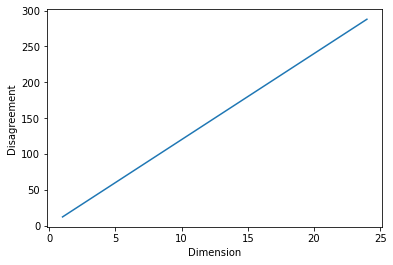

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# your code here

#data = scale(train_matrix) # scale the data
data = StandardScaler(with_mean=False).fit_transform(train_matrix)

#re_dimens = PCA(n_components=2).fit_transform(data)

disagreement_distance = []
for k in range(1,25):

    svd1 = TruncatedSVD(1)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd1, normalizer) 
    Xnew = lsa.fit_transform(data)
    
    
    dim_reduced_dataset = Xnew# your code here
    
    kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit_predict(dim_reduced_dataset)
    labelsk = kmeans.labels_

    disagreement_distance.append(disagreement_dist(labelsk, news_data.target))

plt.plot(range(1,25), disagreement_distance)
plt.ylabel('Disagreement')
plt.xlabel('Dimension')
plt.show()